## First Step : Finding the Perfect Control Stores 

In [1]:
# importing neccesary libraries  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# setting default settings for graphs and charts as we are gonna use them so many times

sns.set_style(style='whitegrid')
plt.rcParams["figure.figsize"] = (12,6)

In [3]:
# Load the dataset

data=pd.read_csv('C:\Retail Reimagined\Given Datasets\QVI_data.csv')

data.head()

<>:3: SyntaxWarning: invalid escape sequence '\R'
<>:3: SyntaxWarning: invalid escape sequence '\R'
C:\Users\welcome\AppData\Local\Temp\ipykernel_16840\2629016493.py:3: SyntaxWarning: invalid escape sequence '\R'
  data=pd.read_csv('C:\Retail Reimagined\Given Datasets\QVI_data.csv')


,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [5]:
# everything is pretty much good here Just that date column needs to be fixed

data['DATE']=pd.to_datetime(data['DATE'])

In [6]:
# now we will extract the pre-trail period (3 months before trial period which is Feb)
# so we need the period from to Nov 1 2018 to Jan 31 2019

pre_trial_period = (data['DATE'] >= '2018-11-01') & (data['DATE'] < '2019-02-01')

In [7]:
pre_trial_data = data[pre_trial_period]

In [8]:
pre_trial_data

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
5,1005,2018-12-28,1,6,86,Cheetos Puffs 165g,1,2.8,165,CHEETOS,MIDAGE SINGLES/COUPLES,Mainstream
6,1007,2018-12-04,1,7,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,110,INFUZIONS,YOUNG SINGLES/COUPLES,Budget
7,1007,2018-12-05,1,8,10,RRD SR Slow Rst Pork Belly 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Budget
8,1009,2018-11-20,1,9,20,Doritos Cheese Supreme 330g,1,5.7,330,DORITOS,NEW FAMILIES,Premium
...,...,...,...,...,...,...,...,...,...,...,...,...
264819,2330331,2018-11-18,77,236760,95,Sunbites Whlegrn Crisps Frch/Onin 90g,2,3.4,90,SUNBITES,RETIREES,Budget
264826,2370581,2018-12-17,88,240317,93,Doritos Corn Chip Southern Chicken 150g,2,7.8,150,DORITOS,OLDER SINGLES/COUPLES,Budget
264827,2370581,2018-12-26,88,240318,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150,KETTLE,OLDER SINGLES/COUPLES,Budget
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream


In [9]:
# now we will see the total sales per store per month
# and for that we firt need a month column

pre_trial_data['MONTH'] = pre_trial_data['DATE'].dt.to_period('M')

C:\Users\welcome\AppData\Local\Temp\ipykernel_16840\4046741495.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_trial_data['MONTH'] = pre_trial_data['DATE'].dt.to_period('M')


In [10]:
# now monthly sales per store per month

monthly_sales = pre_trial_data.groupby(['STORE_NBR', 'MONTH'])['TOT_SALES'].sum().reset_index()

In [11]:
monthly_sales

,STORE_NBR,MONTH,TOT_SALES
0,1,2018-11,192.6
1,1,2018-12,189.6
2,1,2019-01,154.8
3,2,2018-11,162.9
4,2,2018-12,136.0
...,...,...,...
785,271,2018-12,807.4
786,271,2019-01,842.4
787,272,2018-11,376.2
788,272,2018-12,403.9


In [12]:
# now we will convert this dataframe into a pivot table for easier comparison

pivot_sales = monthly_sales.pivot(index='MONTH', columns='STORE_NBR', values='TOT_SALES')

In [13]:
pivot_sales

STORE_NBR,1,2,3,4,5,6,7,8,9,10,...,263,264,265,266,267,268,269,270,271,272
MONTH,,,,,,,,,,,,,,,,,,,,,
2018-11,192.6,162.9,1008.0,1212.0,771.4,255.3,1076.5,349.2,374.4,885.0,...,15.8,184.5,282.8,144.2,40.3,225.4,967.2,965.0,886.4,376.2
2018-12,189.6,136.0,1121.6,1185.6,879.2,209.1,906.1,356.4,382.6,936.6,...,24.6,288.5,205.3,157.8,15.4,207.3,935.4,1038.0,807.4,403.9
2019-01,154.8,162.8,1051.7,1525.0,838.0,191.1,975.1,445.0,399.4,878.6,...,21.3,247.3,176.7,148.7,34.4,157.7,980.4,1066.6,842.4,423.0


In [14]:
# now finally we will corelate the trial stores with every other store and take out 
# the best match for each

trial_stores = [77, 86, 88]

correlations = {}

for trial in trial_stores:
    trial_corr = pivot_sales.corrwith(pivot_sales[trial]).drop(trial)
    best_match = trial_corr.idxmax()
    correlations[trial] = best_match
    print(f"Best control store for trial store {trial} is {best_match} with correlation {trial_corr[best_match]:.2f}")

c:\Retail Reimagined\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Retail Reimagined\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Retail Reimagined\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Best control store for trial store 77 is 117 with correlation 1.00
Best control store for trial store 86 is 218 with correlation 1.00


c:\Retail Reimagined\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Retail Reimagined\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Retail Reimagined\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Retail Reimagined\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Retail Reimagined\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Retail Reimagined\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide

Best control store for trial store 88 is 218 with correlation 1.00


In [15]:
correlations

{77: np.int64(117), 86: np.int64(218), 88: np.int64(218)}

In [16]:
pivot_sales[77].equals(pivot_sales[117])
pivot_sales[86].equals(pivot_sales[218])


False

In [17]:
# Check if trial store sales exactly match control store sales
pivot_sales[77].equals(pivot_sales[117])  # Should return True or False
pivot_sales[86].equals(pivot_sales[218])
pivot_sales[88].equals(pivot_sales[218])


False

In [18]:
# Compare trial vs control sales over 3 months
comparison_77 = pivot_sales[[77, 117]]
comparison_86 = pivot_sales[[86, 218]]
comparison_88 = pivot_sales[[88, 218]]

print(comparison_77)
print(comparison_86)
print(comparison_88)


STORE_NBR    77    117
MONTH                 
2018-11    245.3  26.8
2018-12    267.3  27.9
2019-01    204.4   NaN
STORE_NBR    86    218
MONTH                 
2018-11    918.0  47.6
2018-12    841.2   NaN
2019-01    841.4  38.2
STORE_NBR     88    218
MONTH                  
2018-11    1382.8  47.6
2018-12    1325.2   NaN
2019-01    1266.4  38.2


In [19]:
# Remove stores with missing sales data in any of the 3 months
valid_stores = pivot_sales.dropna(axis=1)

# Now run correlation only on valid stores
correlations = {}

for trial in trial_stores:
    trial_corr = valid_stores.corrwith(valid_stores[trial]).drop(trial)
    best_match = trial_corr.idxmax()
    correlations[trial] = best_match
    print(f"Best control store for trial store {trial} is {best_match} with correlation {trial_corr[best_match]:.2f}")


Best control store for trial store 77 is 136 with correlation 1.00
Best control store for trial store 86 is 124 with correlation 1.00
Best control store for trial store 88 is 251 with correlation 1.00


In [20]:
comparison_77 = pivot_sales[[77, 136]]
comparison_86 = pivot_sales[[86, 124]]
comparison_88 = pivot_sales[[88, 251]]

print(comparison_77)
print(comparison_86)
print(comparison_88)


STORE_NBR    77     136
MONTH                  
2018-11    245.3  150.1
2018-12    267.3  160.3
2019-01    204.4  130.5
STORE_NBR    86     124
MONTH                  
2018-11    918.0  230.4
2018-12    841.2  167.9
2019-01    841.4  161.4
STORE_NBR     88     251
MONTH                   
2018-11    1382.8  542.8
2018-12    1325.2  454.0
2019-01    1266.4  368.0


In [22]:
# Calculate average monthly sales for all stores
avg_sales = pivot_sales.mean()

# Allow only stores with similar scale (within ±30%) as the trial store
correlations = {}

for trial in trial_stores:
    trial_series = pivot_sales[trial]
    trial_avg = trial_series.mean()
    
    # Filter stores with similar magnitude
    similar_scale = avg_sales[(avg_sales >= 0.7 * trial_avg) & (avg_sales <= 1.3 * trial_avg)].index
    
    # Drop NaNs and restrict to similar-scale stores only
    valid_corr_df = pivot_sales[similar_scale].dropna()
    
    trial_corr = valid_corr_df.corrwith(trial_series).drop(trial, errors='ignore')
    
    if not trial_corr.empty:
        best_match = trial_corr.idxmax()
        correlations[trial] = best_match
        print(f"Best control store for trial store {trial} is {best_match} with correlation {trial_corr[best_match]:.2f}")
    else:
        print(f"No valid control store found for trial store {trial}")


Best control store for trial store 77 is 195 with correlation 1.00
Best control store for trial store 86 is 259 with correlation 0.99
Best control store for trial store 88 is 36 with correlation 1.00


In [23]:
comparison_77 = pivot_sales[[77, 195 ]]
comparison_86 = pivot_sales[[86, 259 ]]
comparison_88 = pivot_sales[[88, 36 ]]

print(comparison_77)
print(comparison_86)
print(comparison_88)

STORE_NBR    77     195
MONTH                  
2018-11    245.3  222.2
2018-12    267.3  258.0
2019-01    204.4  153.3
STORE_NBR    86      259
MONTH                   
2018-11    918.0  1064.4
2018-12    841.2   978.6
2019-01    841.4   992.2
STORE_NBR      88      36
MONTH                    
2018-11    1382.8  1098.4
2018-12    1325.2  1014.8
2019-01    1266.4   923.4


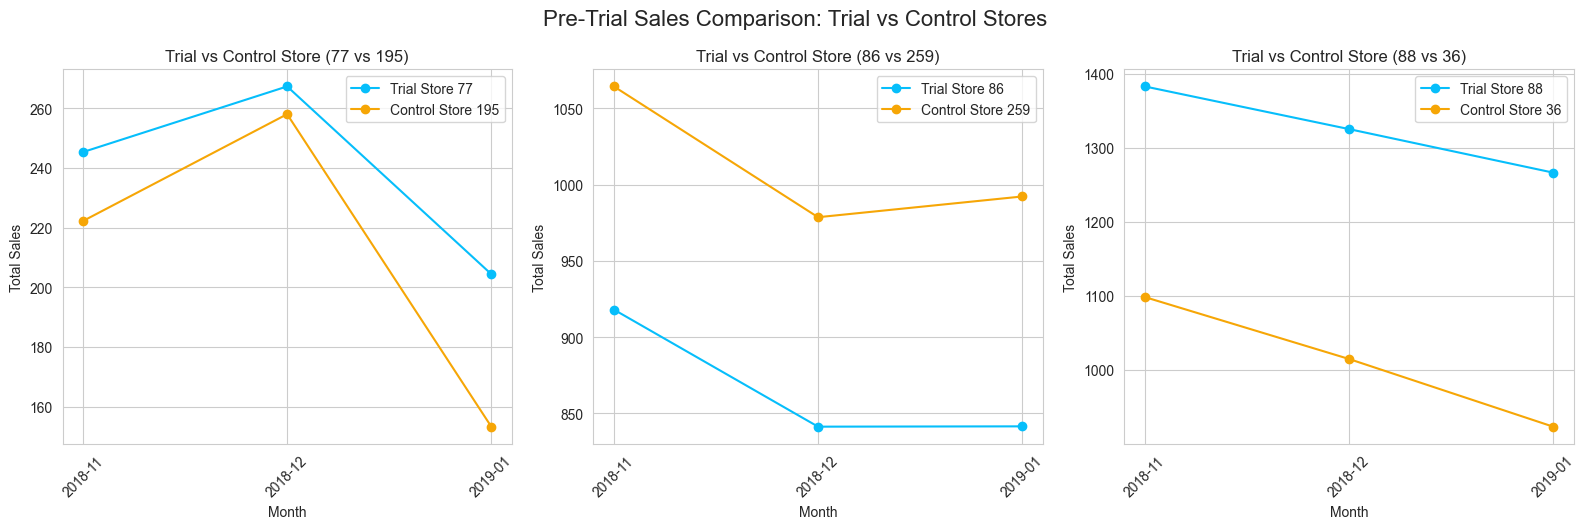

In [24]:
import matplotlib.pyplot as plt

# Create a mapping of trial stores to their control stores
trial_control_map = {77: 195, 86: 259, 88: 36}
custom_colors = ["#06BEFB", "#F6A606"] 
# Plotting
plt.figure(figsize=(16, 5))

for i, (trial, control) in enumerate(trial_control_map.items(), start=1):
    plt.subplot(1, 3, i)
    
    # Extract monthly sales
    trial_sales = pivot_sales[trial]
    control_sales = pivot_sales[control]
    
    # Plot
    plt.plot(trial_sales.index.astype(str), trial_sales.values, label=f'Trial Store {trial}', marker='o', color=custom_colors[0])
    plt.plot(control_sales.index.astype(str), control_sales.values, label=f'Control Store {control}', marker='o', color=custom_colors[1])
    
    # Aesthetics
    plt.title(f"Trial vs Control Store ({trial} vs {control})")
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.legend()
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle("Pre-Trial Sales Comparison: Trial vs Control Stores", fontsize=16, y=1.05)
plt.show()


## Next Step : Analyze Impact During Trial Period

In [25]:
# We'll now examine how the sales trend changed during the trial months (Feb–Apr 2019)
# in each trial store, compared to its matched control store.

In [26]:
# let's start with filtering the trial period data

In [27]:
trial_period = ( data['DATE'] >= '2019-02-01' ) & ( data['DATE'] < '2019-05-01' ) 
trial_data = data[trial_period]
trial_data

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
15,1012,2019-03-15,1,16,20,Doritos Cheese Supreme 330g,1,5.7,330,DORITOS,OLDER FAMILIES,Mainstream
17,1013,2019-03-04,1,18,93,Doritos Corn Chip Southern Chicken 150g,1,3.9,150,DORITOS,RETIREES,Budget
18,1013,2019-03-07,1,19,91,CCs Tasty Cheese 175g,2,4.2,175,CCS,RETIREES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264763,272374,2019-04-24,272,270182,26,Pringles Sweet&Spcy BBQ 134g,2,7.4,134,PRINGLES,OLDER SINGLES/COUPLES,Premium
264771,272381,2019-02-08,272,270190,30,Doritos Corn Chips Cheese Supreme 170g,2,8.8,170,DORITOS,OLDER SINGLES/COUPLES,Budget
264776,272382,2019-02-18,272,270194,32,Kettle Sea Salt And Vinegar 175g,2,10.8,175,KETTLE,OLDER SINGLES/COUPLES,Premium
264783,272389,2019-04-01,272,270202,62,Pringles Mystery Flavour 134g,2,7.4,134,PRINGLES,YOUNG SINGLES/COUPLES,Mainstream


In [28]:
# now we will need a month column here as well to calculate sales per month per store
# Add a MONTH column to group by
trial_data['MONTH'] = trial_data['DATE'].dt.to_period('M')


C:\Users\welcome\AppData\Local\Temp\ipykernel_16840\3137406192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial_data['MONTH'] = trial_data['DATE'].dt.to_period('M')


In [29]:
monthly_trial_sales = trial_data.groupby(['STORE_NBR', 'MONTH'])['TOT_SALES'].sum().reset_index()

In [30]:
monthly_trial_sales

,STORE_NBR,MONTH,TOT_SALES
0,1,2019-02,225.4
1,1,2019-03,192.9
2,1,2019-04,192.9
3,2,2019-02,139.4
4,2,2019-03,192.1
...,...,...,...
789,271,2019-03,735.8
790,271,2019-04,774.6
791,272,2019-02,395.5
792,272,2019-03,442.3


In [31]:
# we will make a pivot table as it's get easier to comapre in that way 
pivot_trial_sales = monthly_trial_sales.pivot(index='MONTH', columns='STORE_NBR', values='TOT_SALES')
pivot_trial_sales

STORE_NBR,1,2,3,4,5,6,7,8,9,10,...,263,264,265,266,267,268,269,270,271,272
MONTH,,,,,,,,,,,,,,,,,,,,,
2019-02,225.4,139.4,1197.7,883.4,727.0,224.0,1026.4,345.4,259.4,853.0,...,37.4,175.2,212.7,119.7,23.0,165.0,955.2,868.4,746.2,395.5
2019-03,192.9,192.1,1124.4,1192.4,681.4,179.5,1145.8,441.4,367.6,862.0,...,26.0,161.0,164.1,128.2,23.6,225.0,845.8,991.2,735.8,442.3
2019-04,192.9,196.5,920.0,1230.5,721.8,197.9,942.4,364.8,267.6,746.2,...,9.0,194.2,236.4,124.4,14.0,191.5,991.2,926.4,774.6,445.1


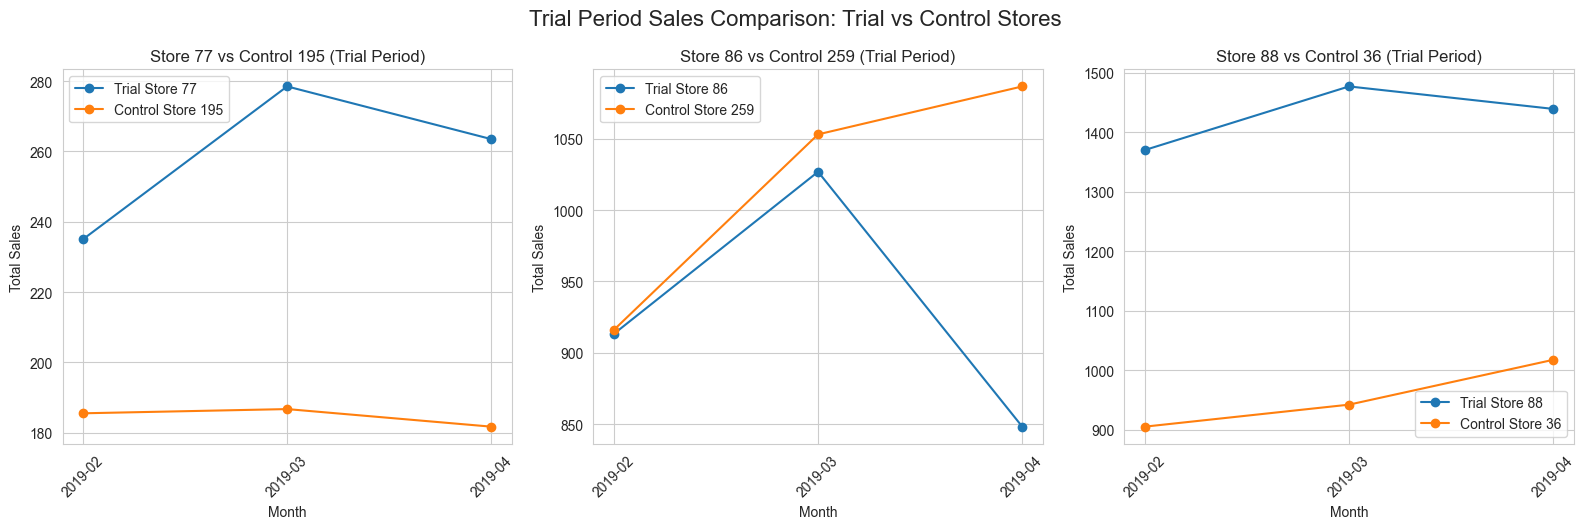

In [32]:
# next we’ll plot the trial vs control store sales during the trial period

# Trial → Control mapping (from earlier matching step)
trial_control_map = {77: 195, 86: 259, 88: 36}

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5))

for i, (trial, control) in enumerate(trial_control_map.items(), start=1):
    plt.subplot(1, 3, i)
    
    plt.plot(pivot_trial_sales.index.astype(str), pivot_trial_sales[trial], label=f'Trial Store {trial}', marker='o')
    plt.plot(pivot_trial_sales.index.astype(str), pivot_trial_sales[control], label=f'Control Store {control}', marker='o')
    
    plt.title(f'Store {trial} vs Control {control} (Trial Period)')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.legend()
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle("Trial Period Sales Comparison: Trial vs Control Stores", fontsize=16, y=1.05)
plt.show()


## 📊 Trial vs Control Store Insights (Pre-Post Comparison)

### 📈 Trial Store 77 vs Control 195
- **Trial Store**: Strong increase in sales during **March**, maintaining a higher level in **April**.
- **Control Store**: Remains flat or slightly declining over the same period.
- ✅ **Insight**: Positive uplift likely — intervention appears effective.

---

### 📉 Trial Store 86 vs Control 259
- **Trial Store**: Rise in **March**, but sharp drop in **April**.
- **Control Store**: Continues to increase consistently.
- ⚠️ **Insight**: No uplift observed — possible **negative effect** from trial.

---

### 📈 Trial Store 88 vs Control 36
- **Trial Store**: Climbs in **March**, slight dip in **April**, but remains above **February** levels.
- **Control Store**: Shows a steady but smaller increase.
- ✅ **Insight**: Likely **positive uplift** — trial seems to have had a beneficial impact.

---


#### Now let's move into quantifying this impact — calculating uplift % and checking if the change is statistically significant.

In [33]:
# We’ll start by comparing the mean sales during the trial period for each trial store
# vs its control store.

avg_sales_trial_period = {}

for trial, control in trial_control_map.items():
    trial_avg = pivot_trial_sales[trial].mean()
    control_avg = pivot_trial_sales[control].mean()
    avg_sales_trial_period[trial] = {
        'trial_avg': trial_avg,
        'control_avg': control_avg
    }
    print(f"Store {trial} — Trial Avg: {trial_avg:.2f}, Control Avg: {control_avg:.2f}")

Store 77 — Trial Avg: 259.00, Control Avg: 184.63
Store 86 — Trial Avg: 929.40, Control Avg: 1018.53
Store 88 — Trial Avg: 1428.93, Control Avg: 954.80


In [34]:
# pretty obvious ouput 
# now let's  Calculate Uplift Percentage

for trial, values in avg_sales_trial_period.items():
    trial_avg = values['trial_avg']
    control_avg = values['control_avg']
    uplift_pct = ((trial_avg - control_avg)/control_avg) * 100
    avg_sales_trial_period[trial]['uplift_pct'] = uplift_pct
    
    print(f"Store {trial} — Uplift: {uplift_pct:.2f}%")


Store 77 — Uplift: 40.28%
Store 86 — Uplift: -8.75%
Store 88 — Uplift: 49.66%


#### we’ll move on to the final step: checking if these differences are statistically significant using a T-test.

In [35]:
from scipy.stats import ttest_ind

# Loop through each pair and run t-test
for trial, control in trial_control_map.items():
    trial_sales = pivot_trial_sales[trial]
    control_sales = pivot_trial_sales[control]
    
    t_stat, p_value = ttest_ind(trial_sales, control_sales, equal_var=False)
    
    print(f"Store {trial} — T-statistic: {t_stat:.2f}, P-value: {p_value:.5f}")


Store 77 — T-statistic: 5.79, P-value: 0.02680
Store 86 — T-statistic: -1.21, P-value: 0.29365
Store 88 — T-statistic: 10.41, P-value: 0.00049


## 🧾 Final Summary: Trial vs Control Store Results (Feb–Apr 2019)

After comparing each trial store with its best-matched control store, we evaluated the sales performance during the trial period using average sales uplift and statistical testing (T-Test):

| Trial Store | Control Store | Avg Trial Sales | Avg Control Sales | Uplift % | P-Value   | Statistically Significant? |
|-------------|----------------|------------------|--------------------|----------|-----------|-----------------------------|
| 77          | 195            | 259.00           | 184.63             | +40.28%  | 0.02680   | ✅ Yes                      |
| 86          | 259            | 929.40           | 1018.53            | -8.75%   | 0.29365   | ❌ No                       |
| 88          | 36             | 1428.93          | 954.80             | +49.66%  | 0.00049   | ✅ Yes                      |

---

## 🧠 Interpretation:

- **Store 77**: Significant uplift in sales during the trial — strong candidate for rollout.
- **Store 86**: Slight drop in sales, but statistically **insignificant** — likely just random variation.
- **Store 88**: Strong and statistically significant uplift — very successful trial store.

---

## ✅ Conclusion:

- The trial intervention had a **positive and statistically significant impact** on sales in **2 out of 3** trial stores.
- Based on this, the strategy tested in trial stores 77 and 88 can be **considered for expansion** to other locations.
